## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

Import dataset 

In [2]:
df = pd.read_csv('AwaasPlusData_18092023.csv',encoding='cp1252')

In [3]:
df.head(5)

,state_code,state_name,District_Code,district_name,Block_Code,block_name,Panchayat_Code,panchayat_name,Minority,Others,SC,ST,Total
0,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6500.0,NANCOWRY,NaN,CHOWRA TC,0,0,0,6,6
1,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6499.0,NICOBAR,259313.0,TRIBAL COUNCIL,0,0,0,2,2
2,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234530.0,GOVINDNAGAR,25,130,0,0,155
3,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234529.0,CAMPBELL BAY,21,29,0,0,50
4,35,ANDAMAN AND NICOBAR,603.0,NICOBARS,6498.0,CAMPBELL BAY,234531.0,LAXMI NAGAR,9,46,0,0,55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270696 entries, 0 to 270695
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state_code      270696 non-null  int64  
 1   state_name      270696 non-null  object 
 2   District_Code   270626 non-null  float64
 3   district_name   270696 non-null  object 
 4   Block_Code      267663 non-null  float64
 5   block_name      270696 non-null  object 
 6   Panchayat_Code  249564 non-null  float64
 7   panchayat_name  270695 non-null  object 
 8   Minority        270696 non-null  int64  
 9   Others          270696 non-null  int64  
 10  SC              270696 non-null  int64  
 11  ST              270696 non-null  int64  
 12  Total           270696 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 26.8+ MB


In [5]:
100*df.isnull().sum()/len(df) # Null value percentage 

state_code        0.000000
state_name        0.000000
District_Code     0.025859
district_name     0.000000
Block_Code        1.120445
block_name        0.000000
Panchayat_Code    7.806543
panchayat_name    0.000369
Minority          0.000000
Others            0.000000
SC                0.000000
ST                0.000000
Total             0.000000
dtype: float64

District code, Block code and Panchayat code can be dropped for now as they are representing respective District name, Block name and Panchayat name,
 We will analyse the data without these code for now.

In [6]:
df1 = df.drop(['District_Code', 'Block_Code', 'Panchayat_Code'], axis = 1)

In [7]:
df1 = df1[~(df1.panchayat_name.isnull())] #Drop single row  with null data for panchayat name (we dont have panchayat code for it as well)

In [8]:
row0 = {'state_name': 'DELHI', 'Total': 0}
row1 = {'state_name': 'CHANDIGARH', 'Total': 0}
df1 = df1._append(row0, ignore_index = True)
df1 = df1._append(row1, ignore_index = True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270697 entries, 0 to 270696
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state_code      270695 non-null  float64
 1   state_name      270697 non-null  object 
 2   district_name   270695 non-null  object 
 3   block_name      270695 non-null  object 
 4   panchayat_name  270695 non-null  object 
 5   Minority        270695 non-null  float64
 6   Others          270695 non-null  float64
 7   SC              270695 non-null  float64
 8   ST              270695 non-null  float64
 9   Total           270697 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 20.7+ MB


In [10]:
df1.head(5)

,state_code,state_name,district_name,block_name,panchayat_name,Minority,Others,SC,ST,Total
0,35.0,ANDAMAN AND NICOBAR,NICOBARS,NANCOWRY,CHOWRA TC,0.0,0.0,0.0,6.0,6
1,35.0,ANDAMAN AND NICOBAR,NICOBARS,NICOBAR,TRIBAL COUNCIL,0.0,0.0,0.0,2.0,2
2,35.0,ANDAMAN AND NICOBAR,NICOBARS,CAMPBELL BAY,GOVINDNAGAR,25.0,130.0,0.0,0.0,155
3,35.0,ANDAMAN AND NICOBAR,NICOBARS,CAMPBELL BAY,CAMPBELL BAY,21.0,29.0,0.0,0.0,50
4,35.0,ANDAMAN AND NICOBAR,NICOBARS,CAMPBELL BAY,LAXMI NAGAR,9.0,46.0,0.0,0.0,55


## Visualize the Average houses allotment accross the communities, state wise.

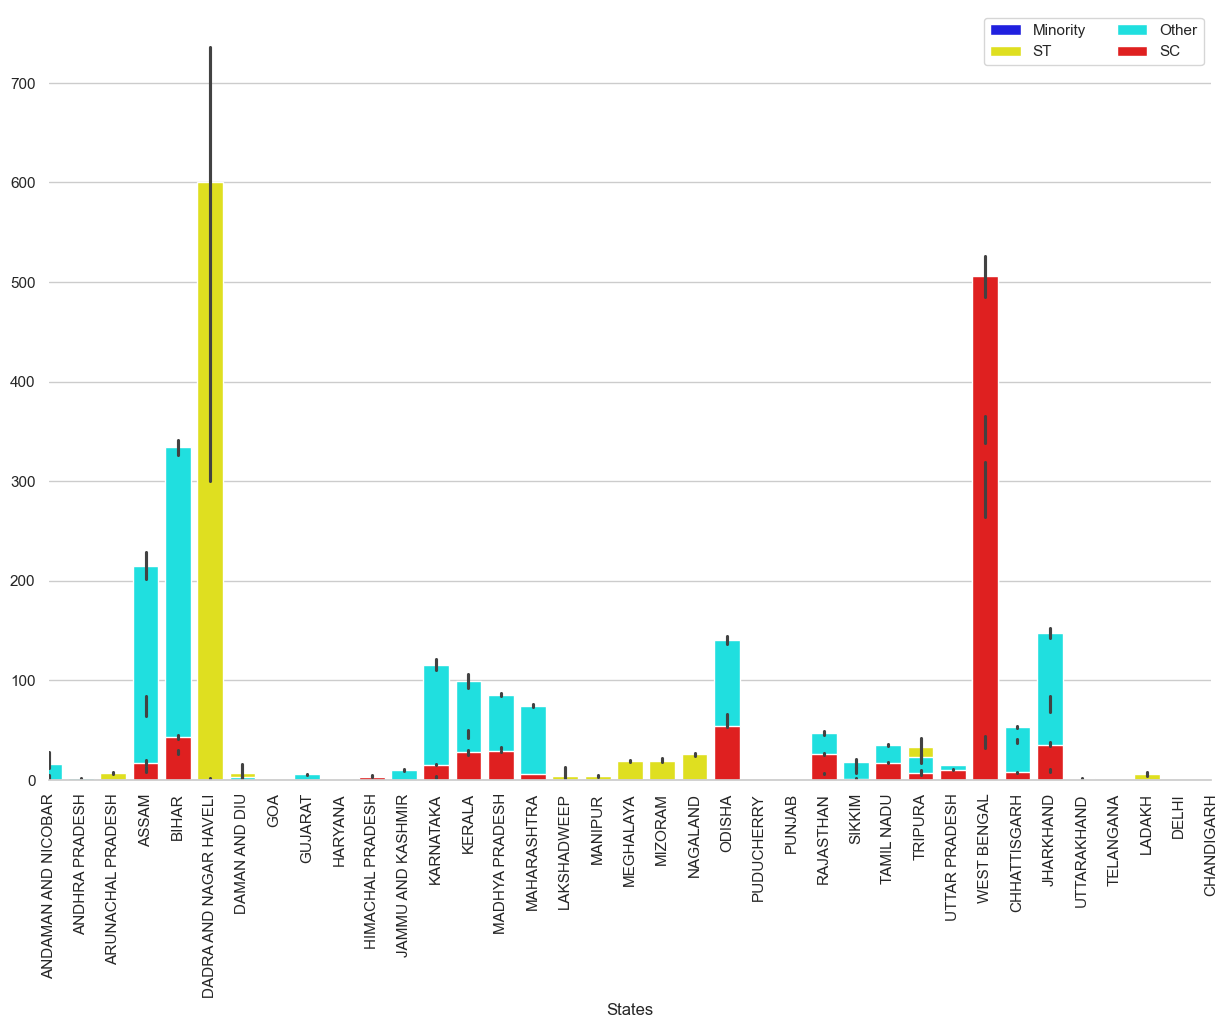

In [11]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))


ax = sns.barplot(x = df1.state_name, y = df1.Minority, color = 'blue', estimator=np.median, label = 'Minority')
ax = sns.barplot(x = df1.state_name, y = df1.ST, color = 'yellow', estimator=np.median, label = 'ST') 
ax = sns.barplot(x = df1.state_name, y = df1.Others, color = 'cyan', estimator=np.median, label = 'Other')
ax = sns.barplot(x = df1.state_name, y = df1.SC, color = 'red', estimator=np.median, label = 'SC')
plt.xticks(rotation = 90)

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 36), ylabel="",
       xlabel="States")
sns.despine(left=True, bottom=False)

#ticks = np.arange(0, 4000000, 1000000)
#labels = ["{}M".format(i//1000000) for i in ticks]
#plt.yticks(ticks, labels)

plt.show()

Lets find percentage of allotment accross communities all over india.

In [12]:
total_community = df1.Total.sum()
total_Minority = df1.Minority.sum()
total_SC = df1.SC.sum()
total_ST = df1.ST.sum()
total_Other = df1.Others.sum()

In [13]:
print(f'Total houses alloted: {total_community}')
print(f'Minority: {total_Minority}, {round(100*total_Minority/total_community)}%')
print(f'Other: {total_Other}, {round(100*total_Other/total_community)}%')
print(f'SC: {total_SC}, {round(100*total_SC/total_community)}%')
print(f'ST: {total_ST}, {round(100*total_ST/total_community)}%')

Total houses alloted: 43195243
Minority: 5532682.0, 13%
Other: 20258396.0, 47%
SC: 8638994.0, 20%
ST: 8765171.0, 20%


## State wise number of houses alloted

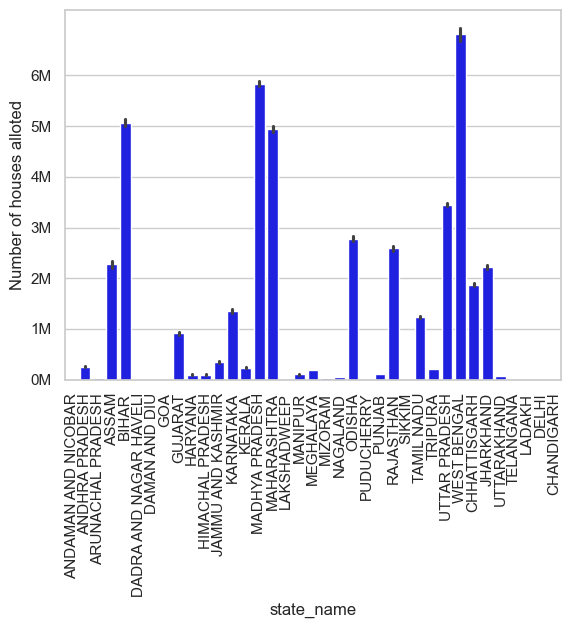

In [14]:
sns.barplot(x = df1.state_name, y = df1.Total, color = 'blue', estimator=np.sum)
plt.xticks(rotation = 90)
plt.ylabel('Number of houses alloted')

ticks = np.arange(0, 7000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)

plt.show()

Lets analys West bengal data, as it has most number of aawas alotted.

In [15]:
wb_df = df1[df1.state_name == 'WEST BENGAL']
wb_df.shape

(3354, 10)

In [16]:
wb_df['district_name'].describe()

count                  3354
unique                   23
top       24 PARGANAS SOUTH
freq                    312
Name: district_name, dtype: object

Out of 23 Districts "24 PARGANAS SOUTH" has most number of panchayat and block entries. (apparently most number of house allotment as well, though details above are not indication of that)

## District wise house allotment for states and UTs throughout India

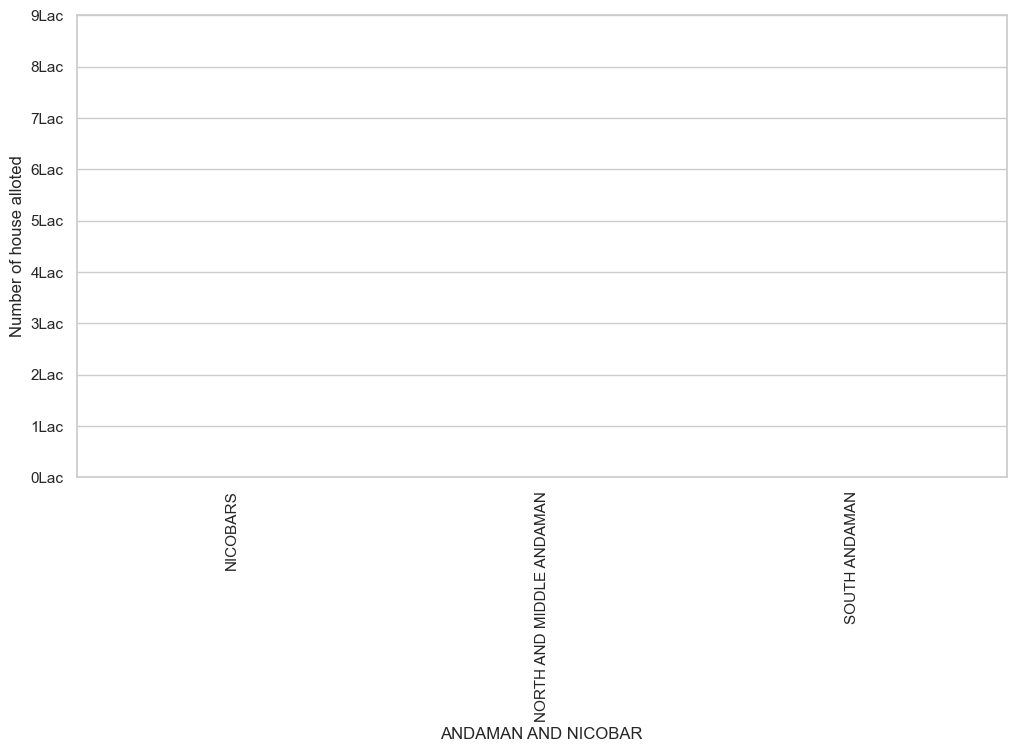

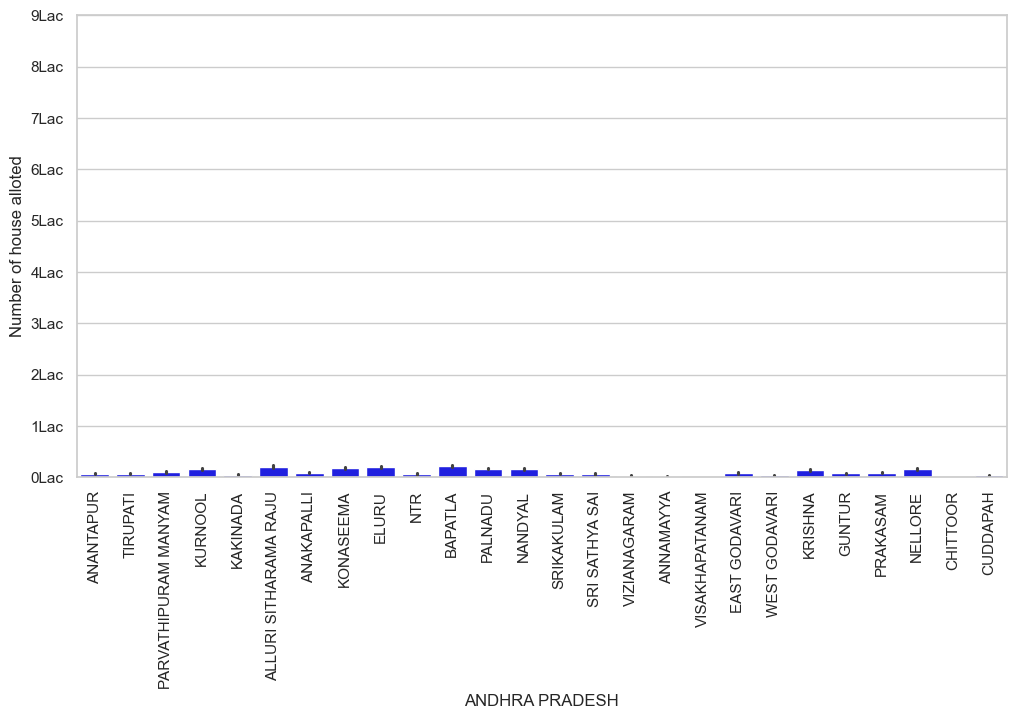

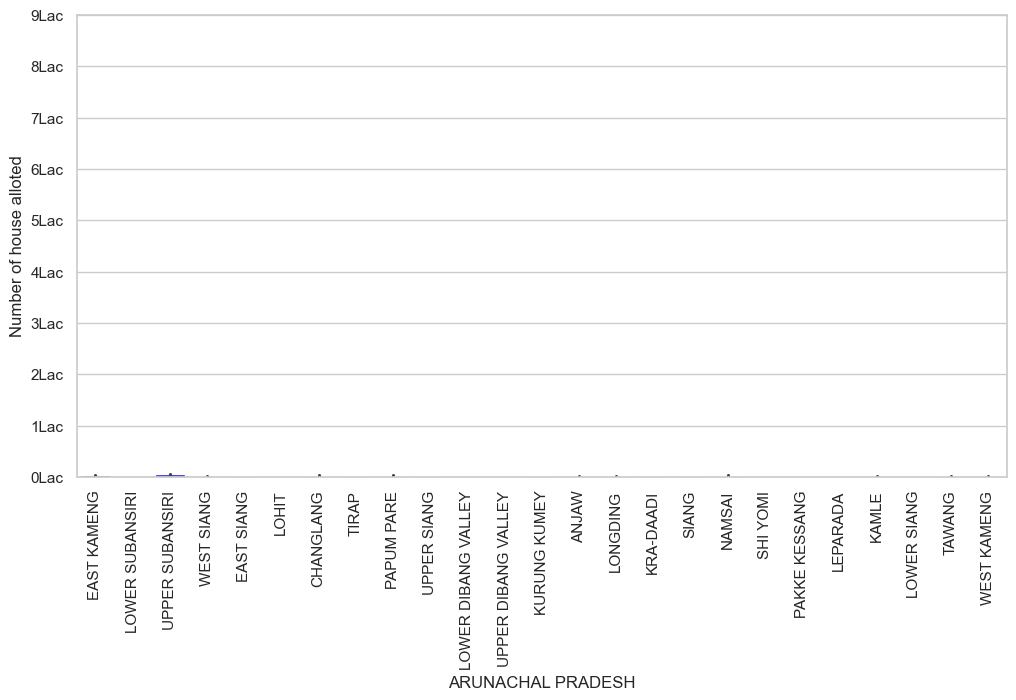

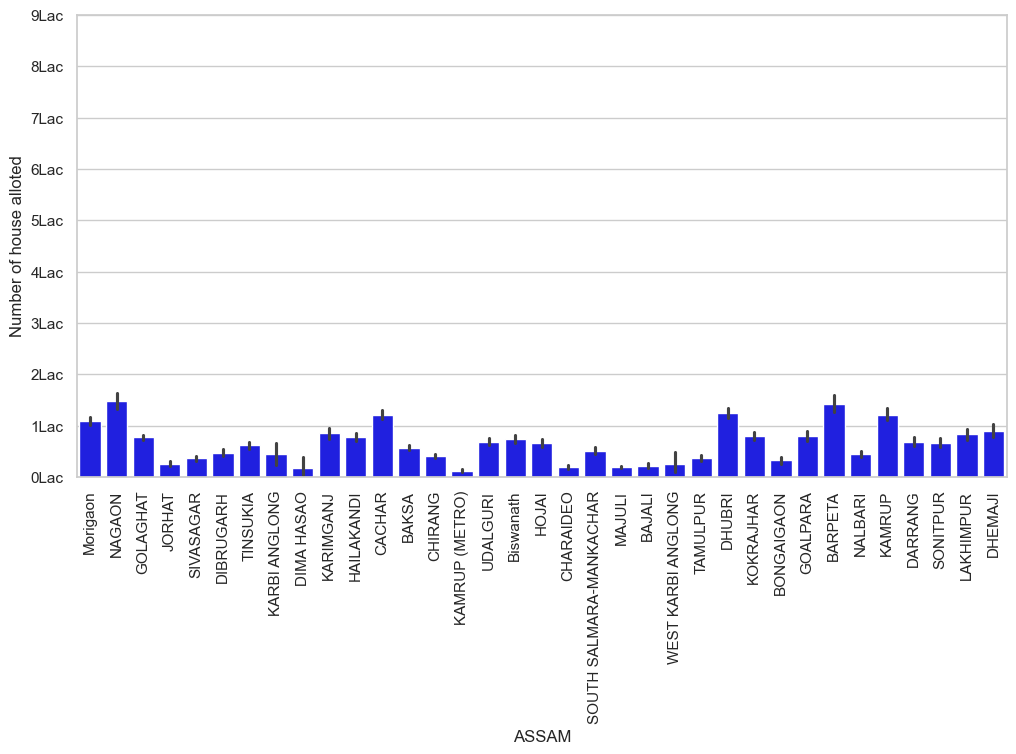

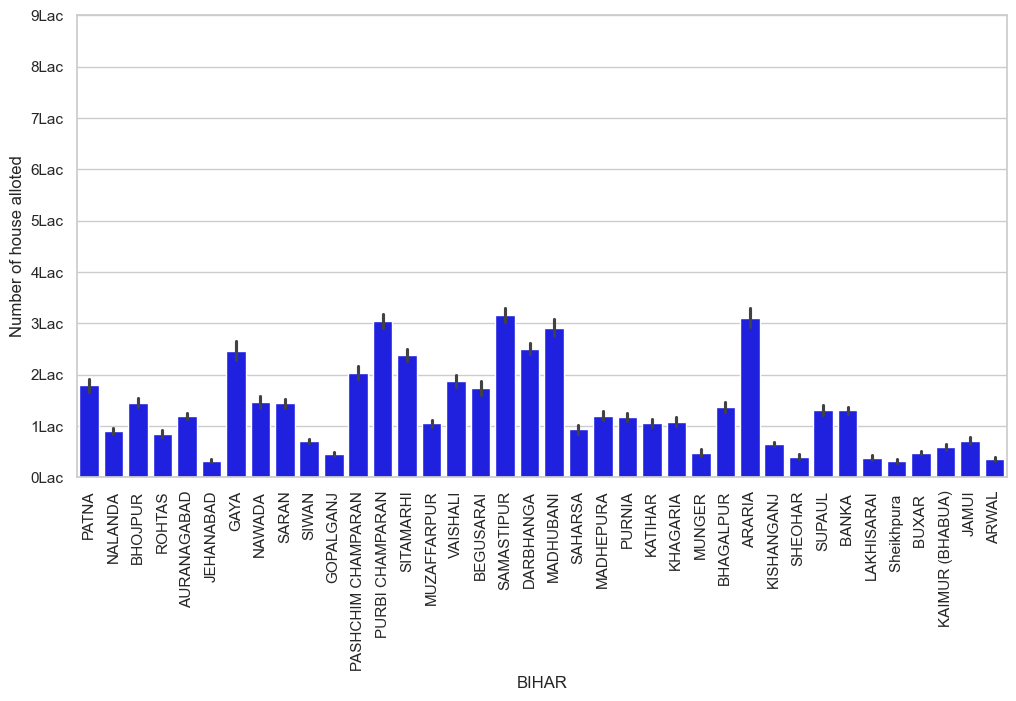

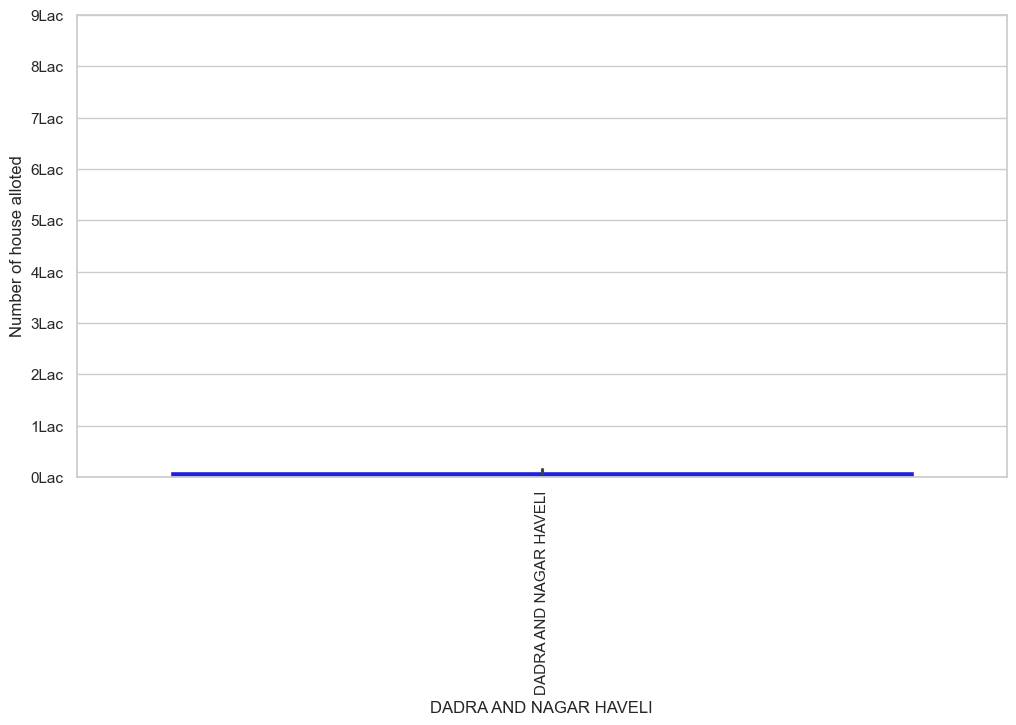

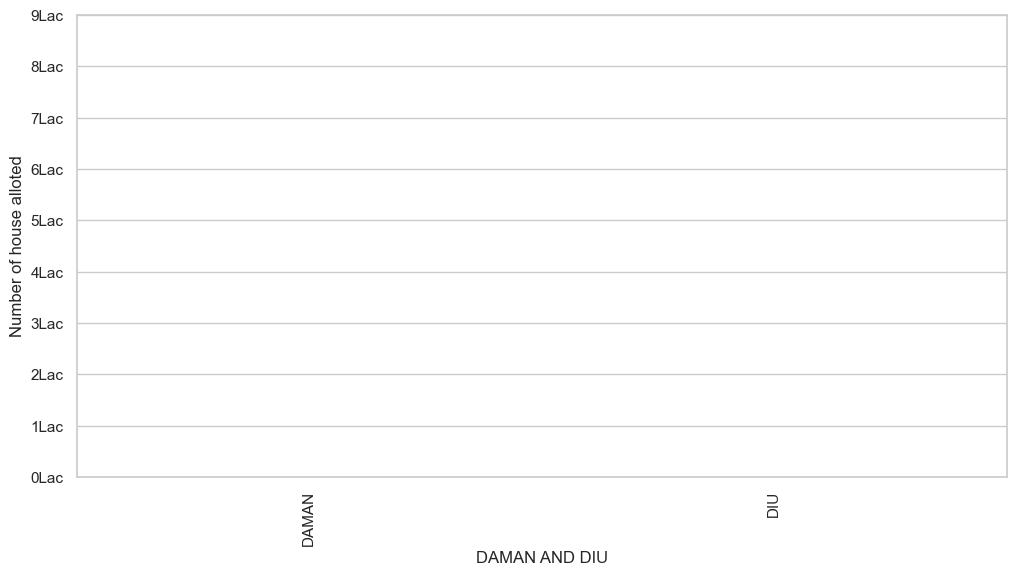

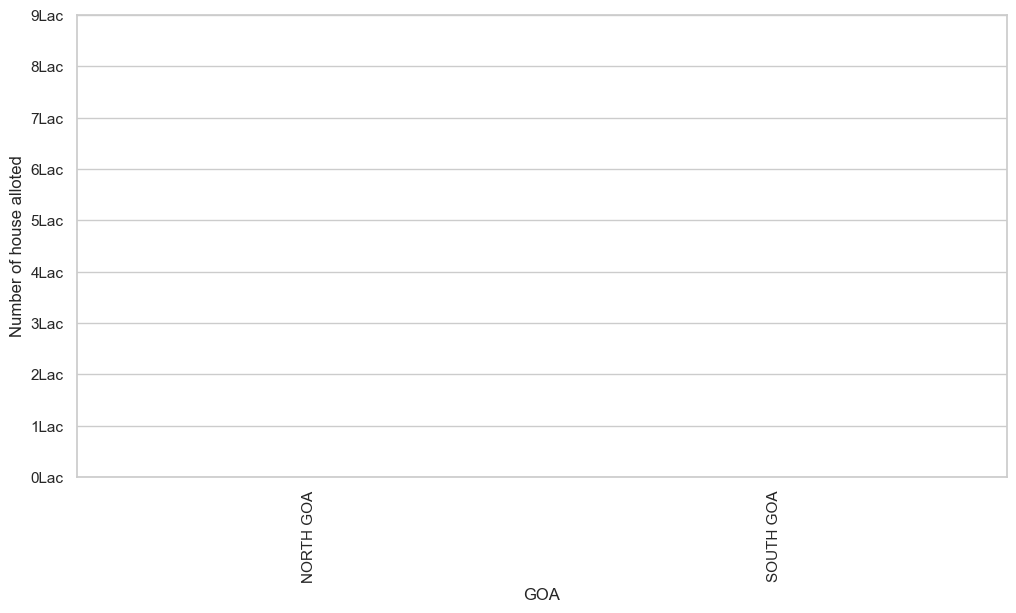

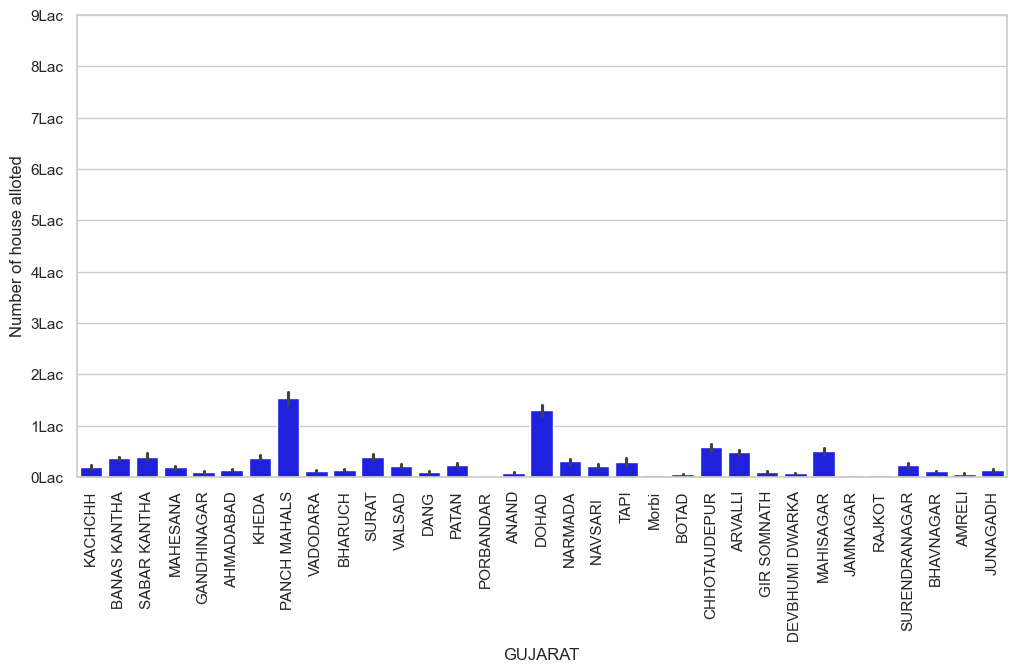

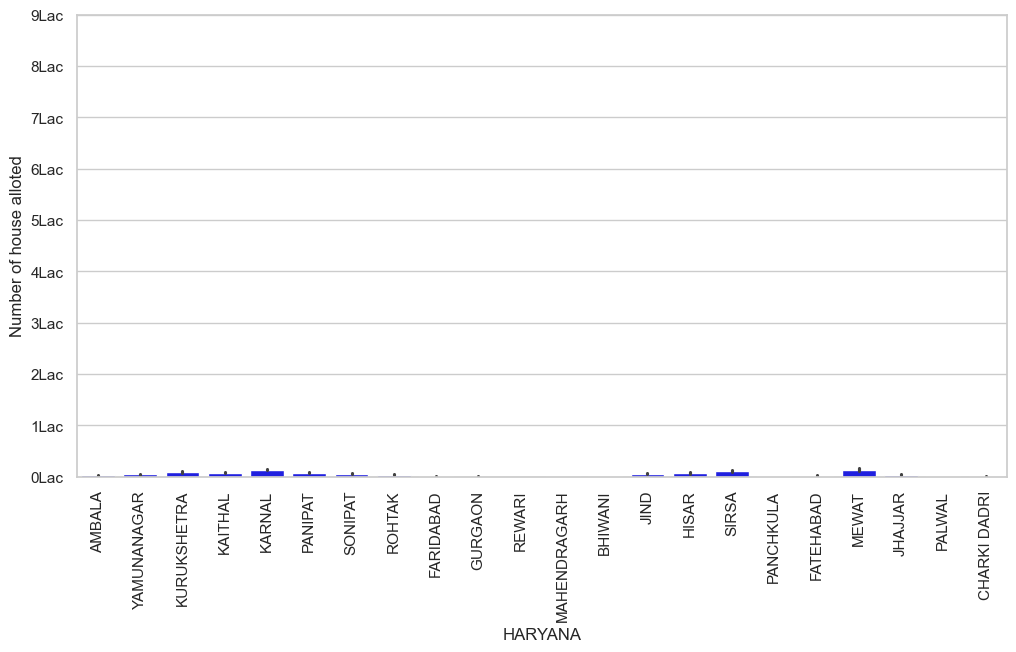

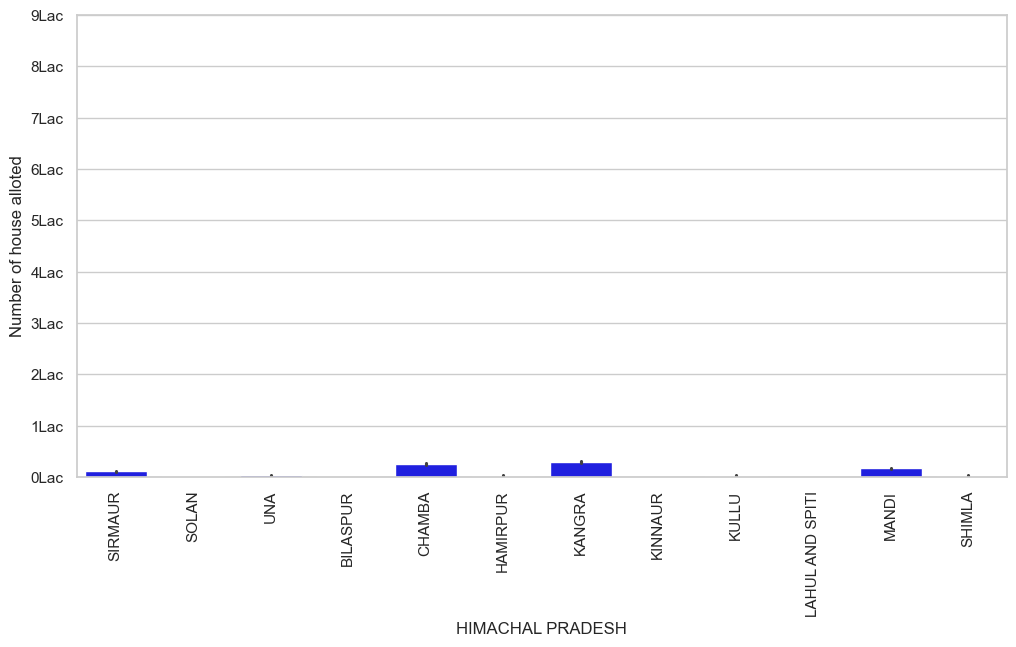

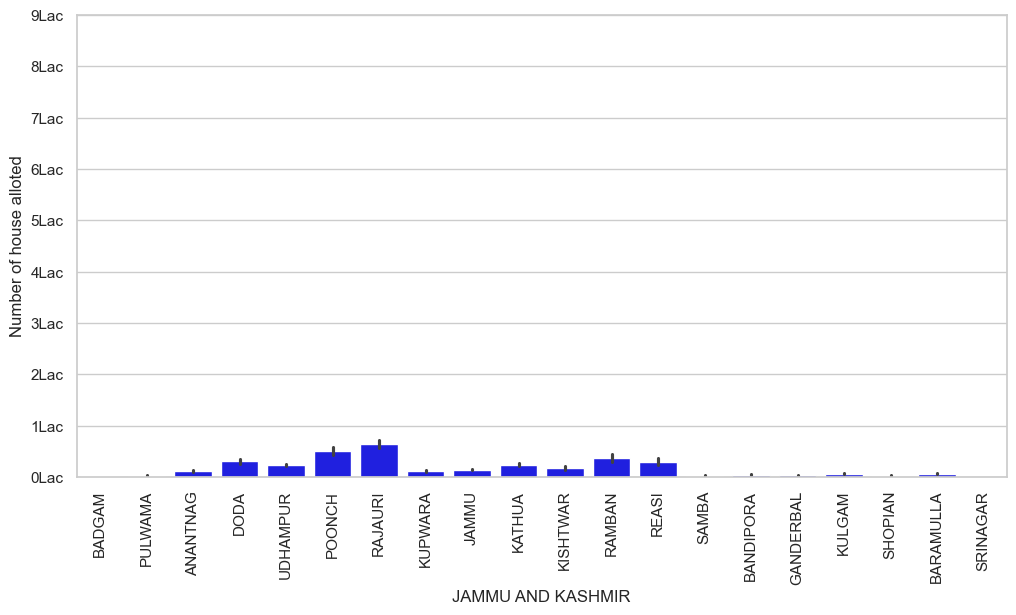

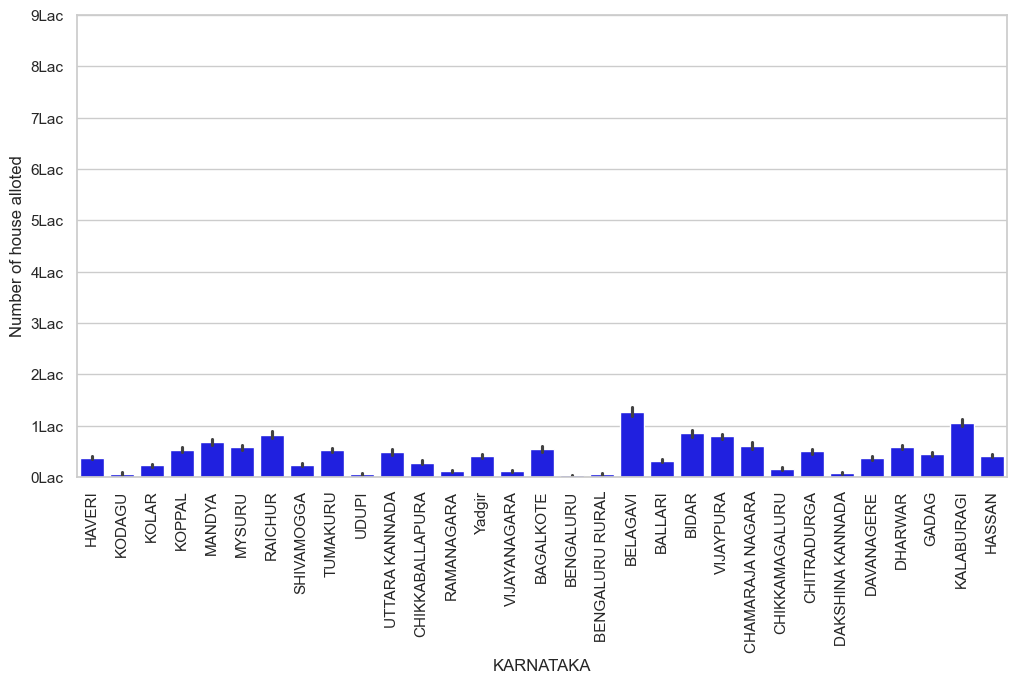

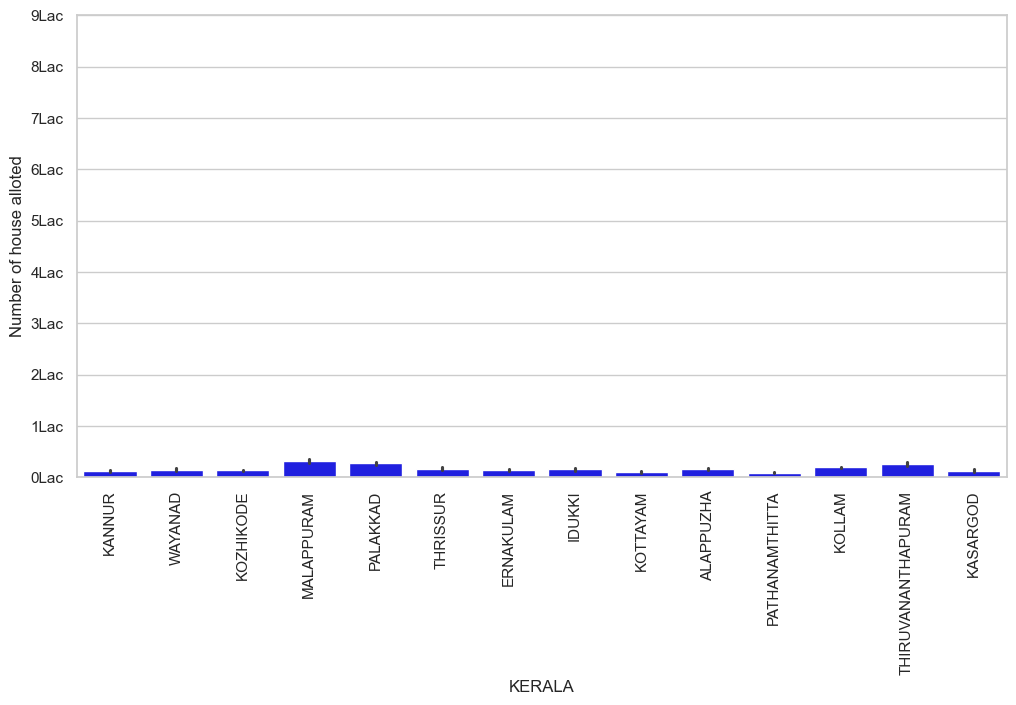

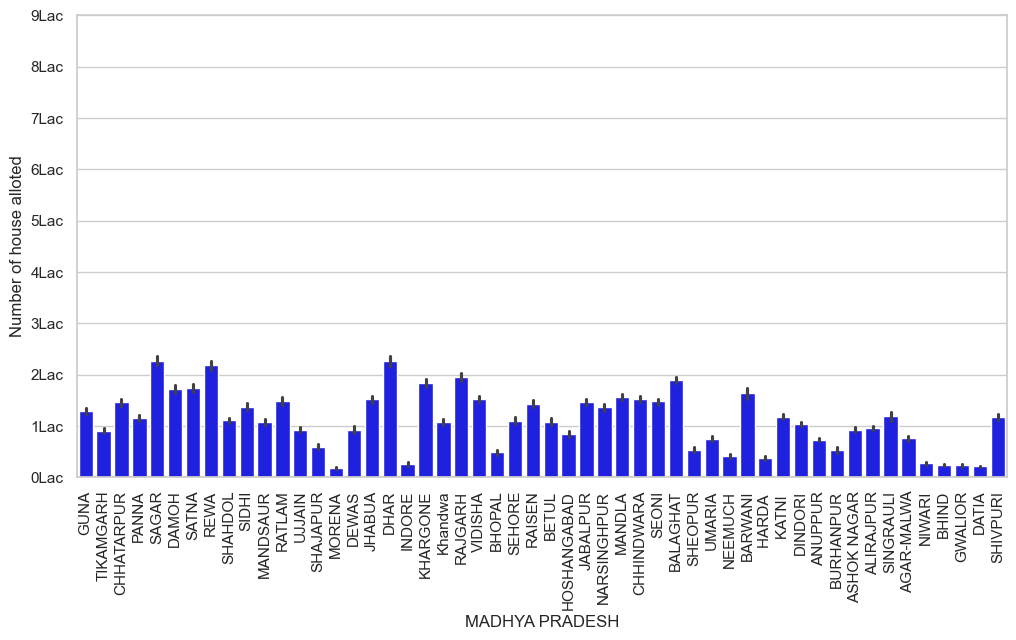

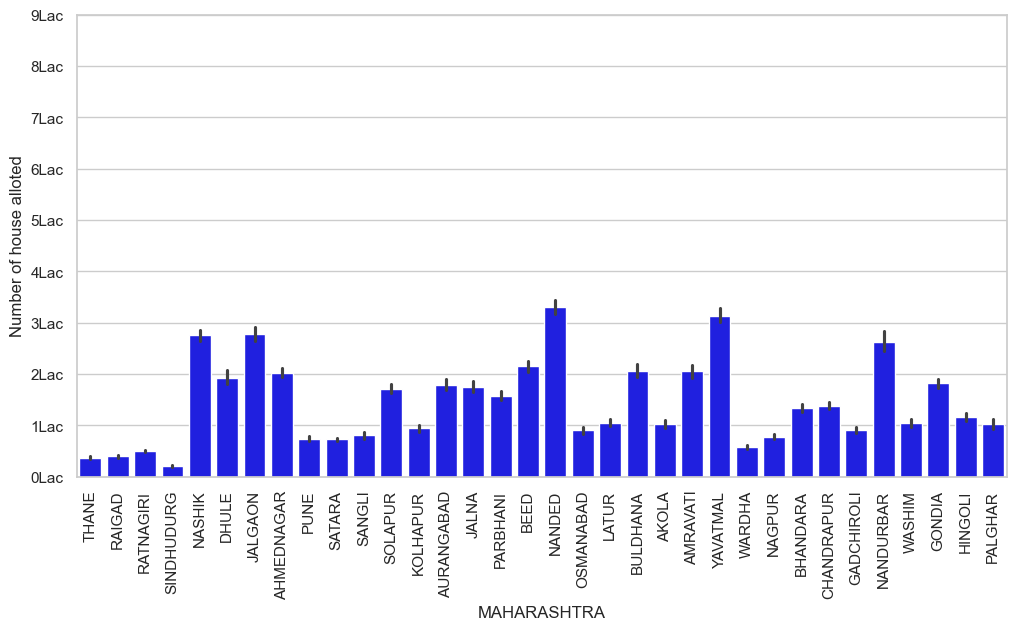

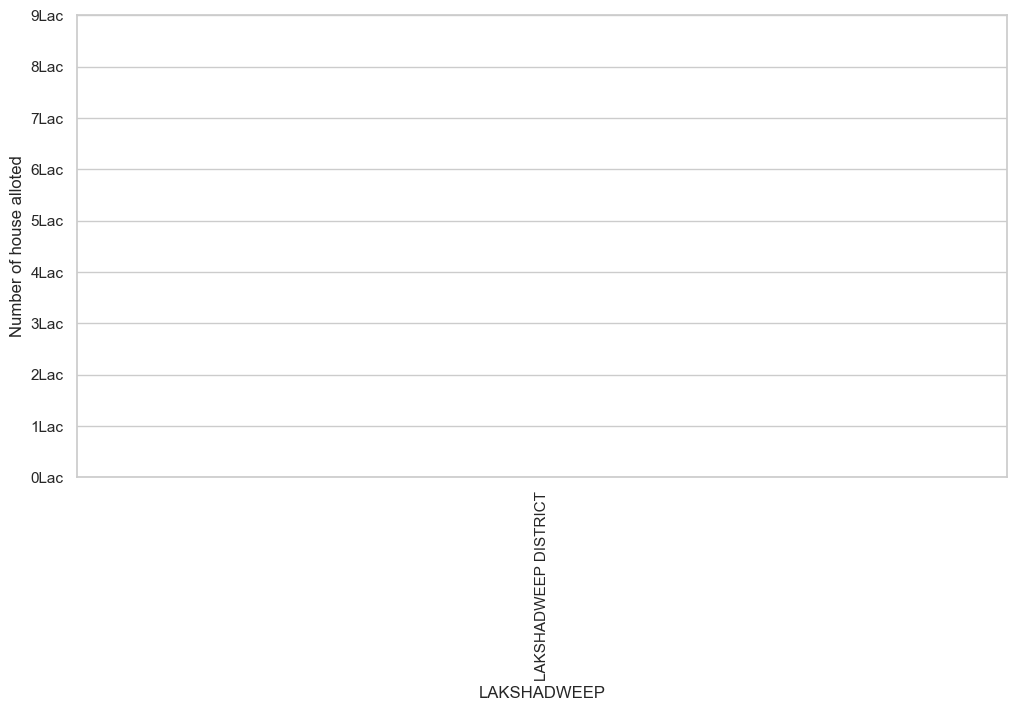

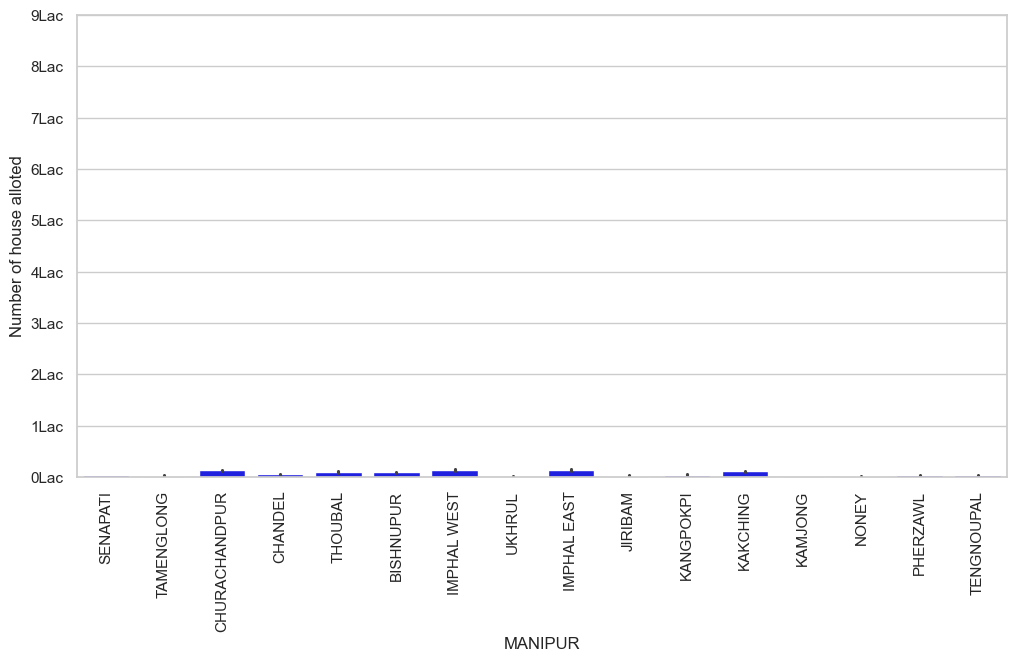

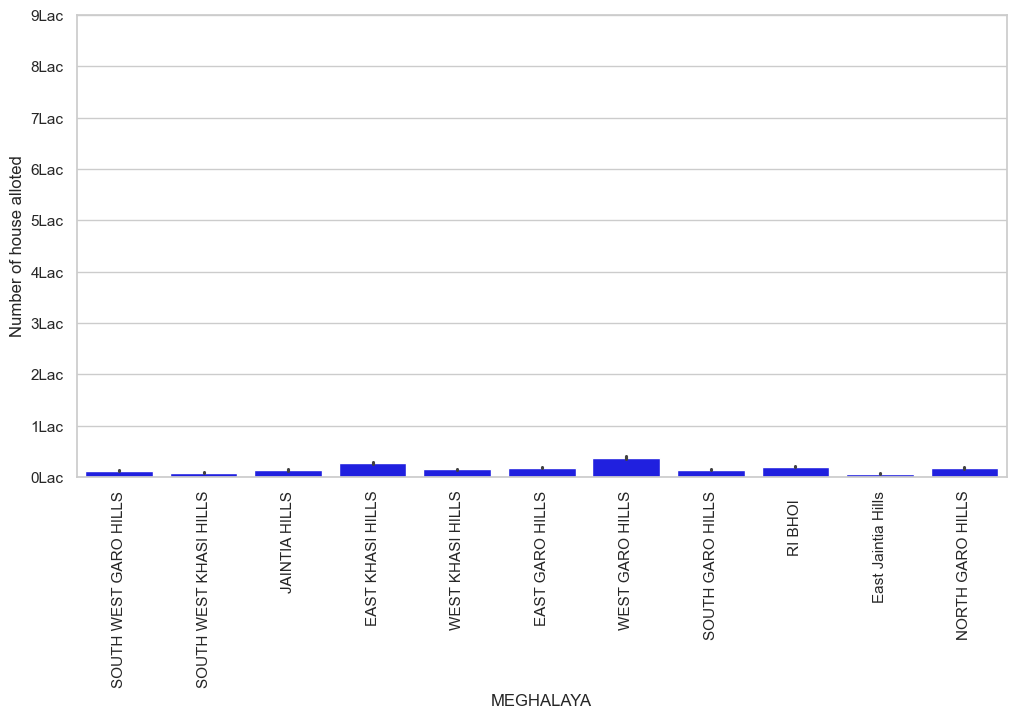

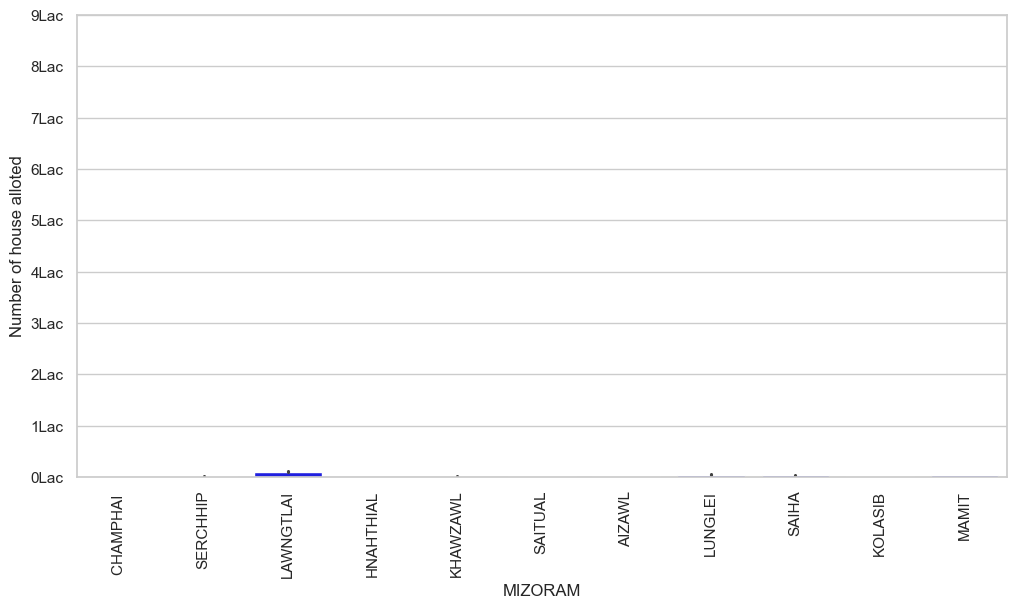

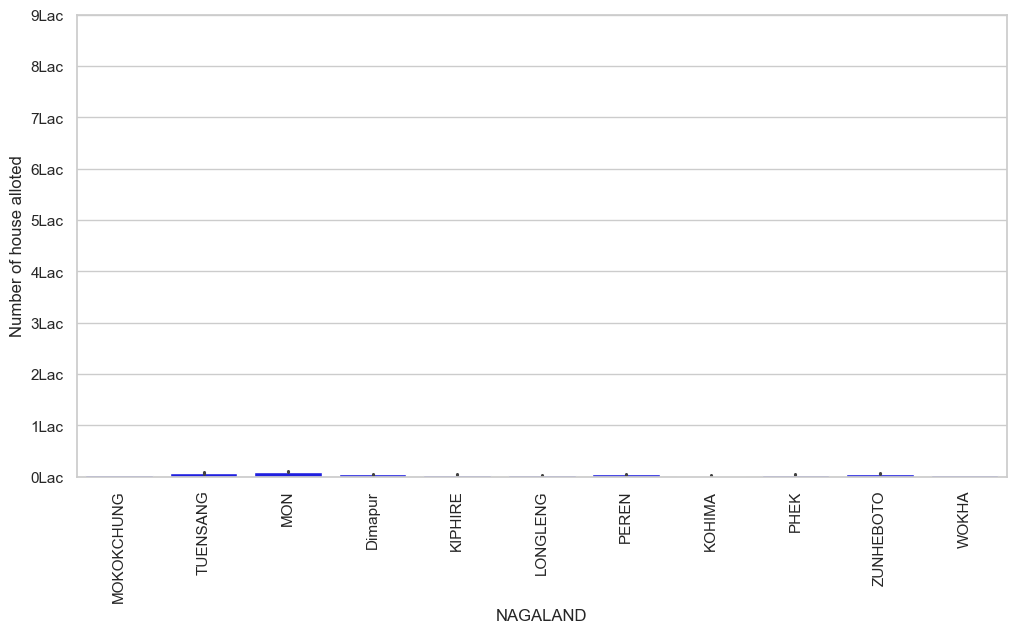

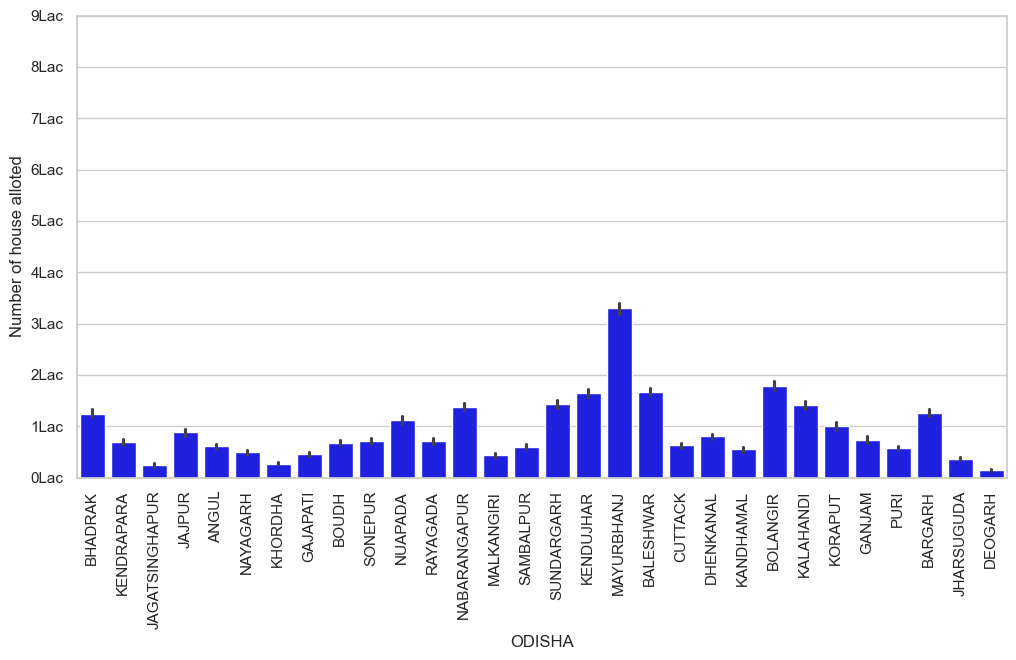

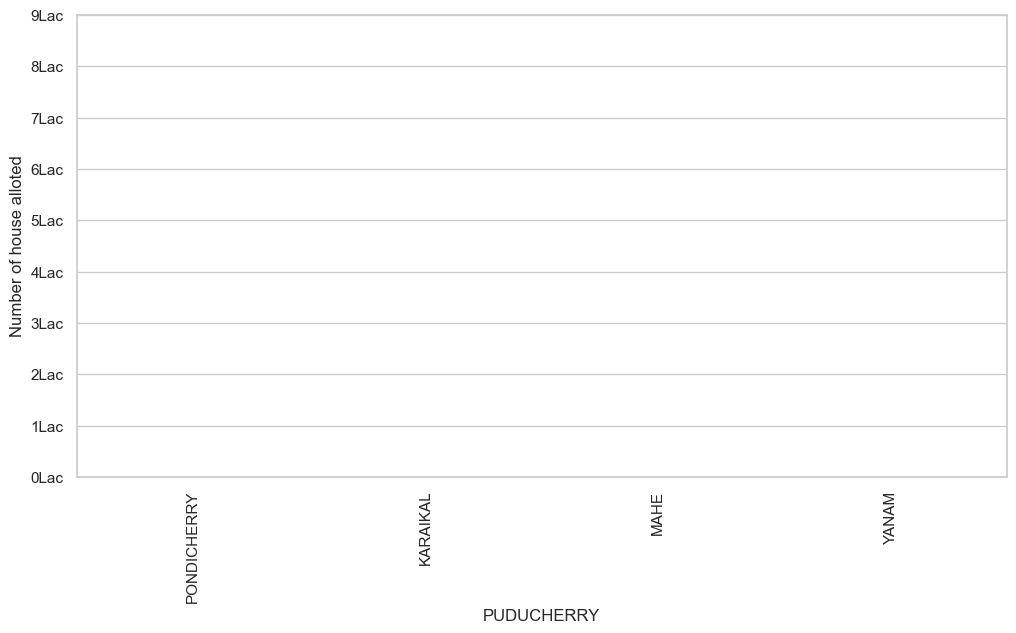

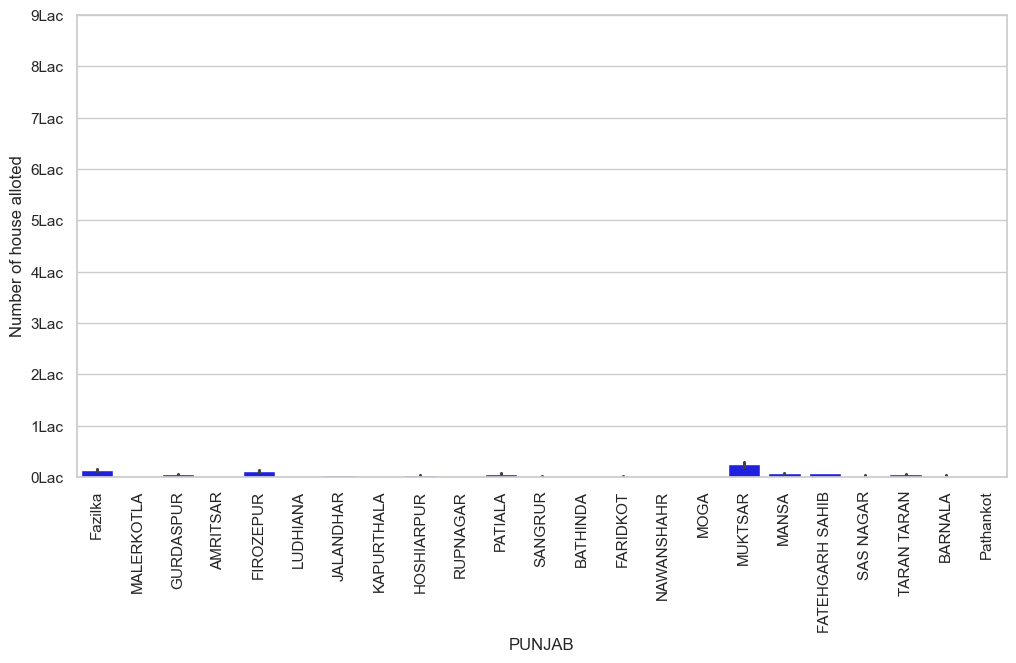

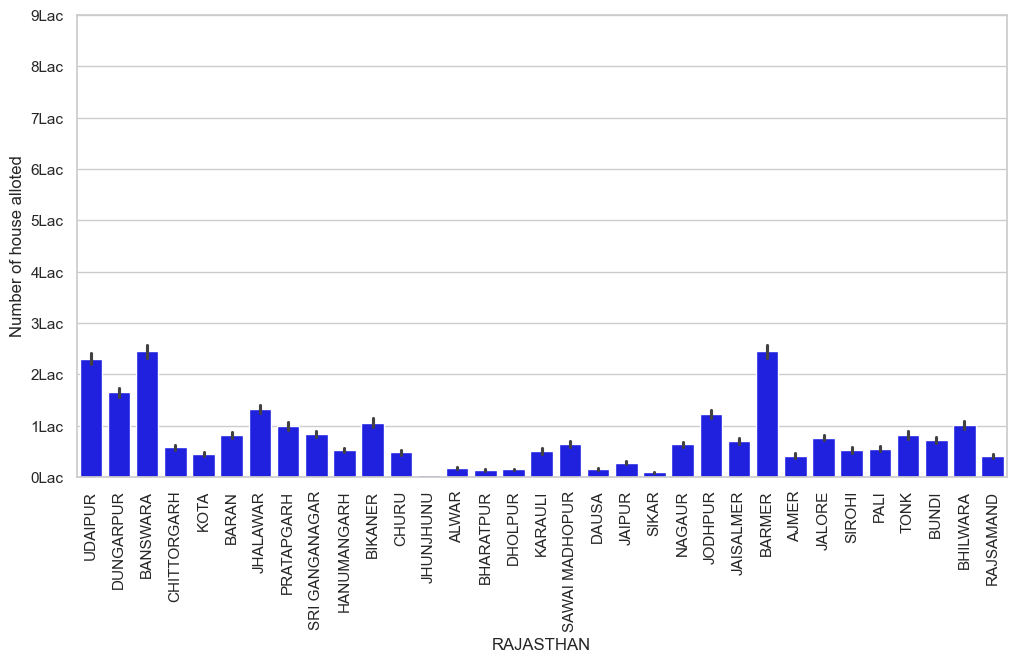

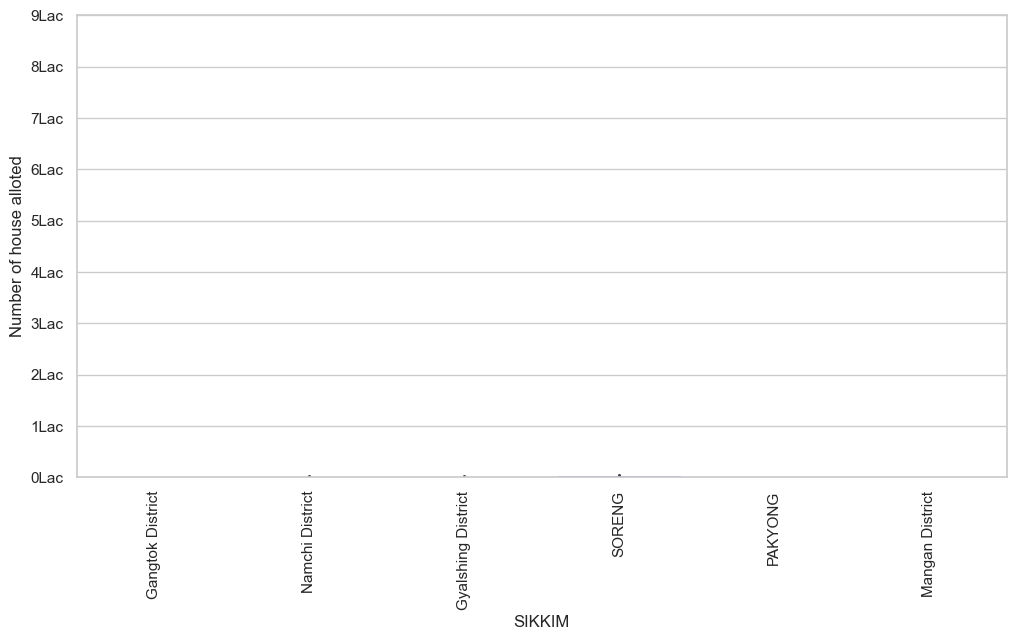

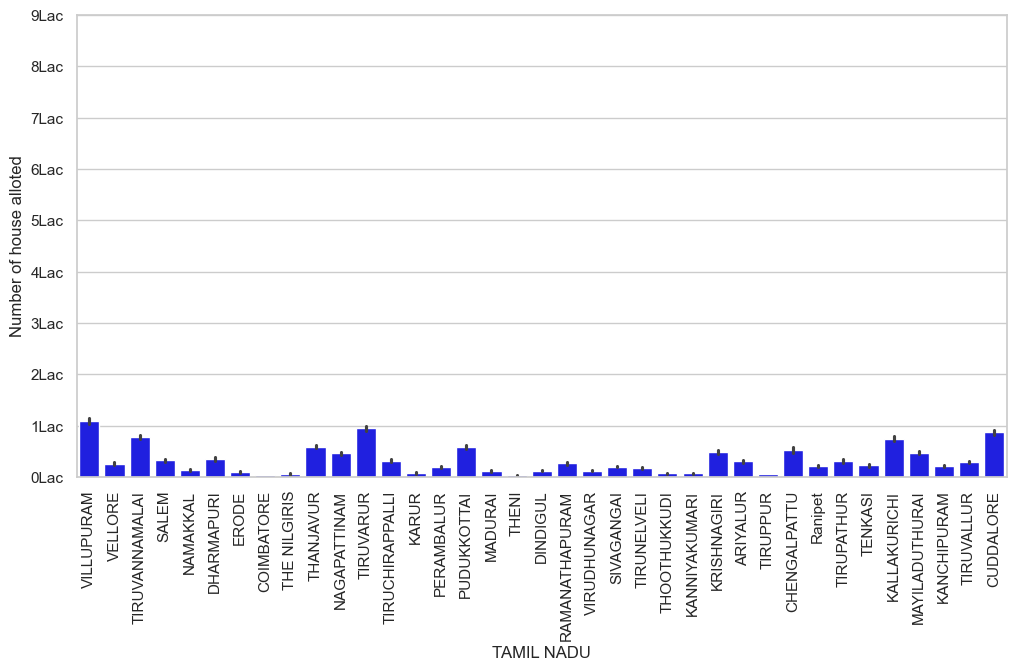

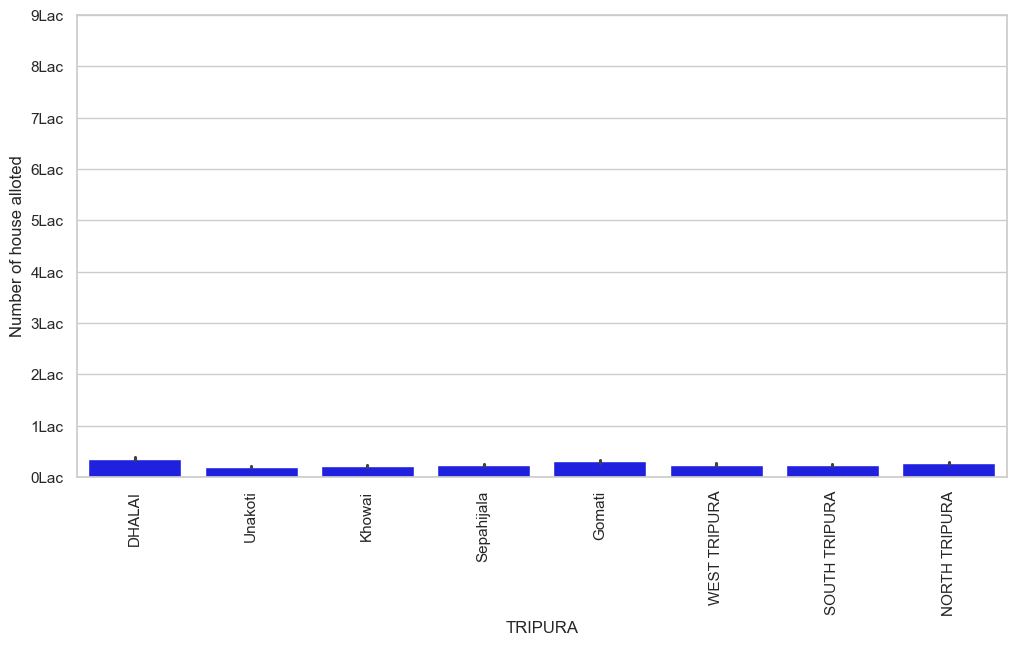

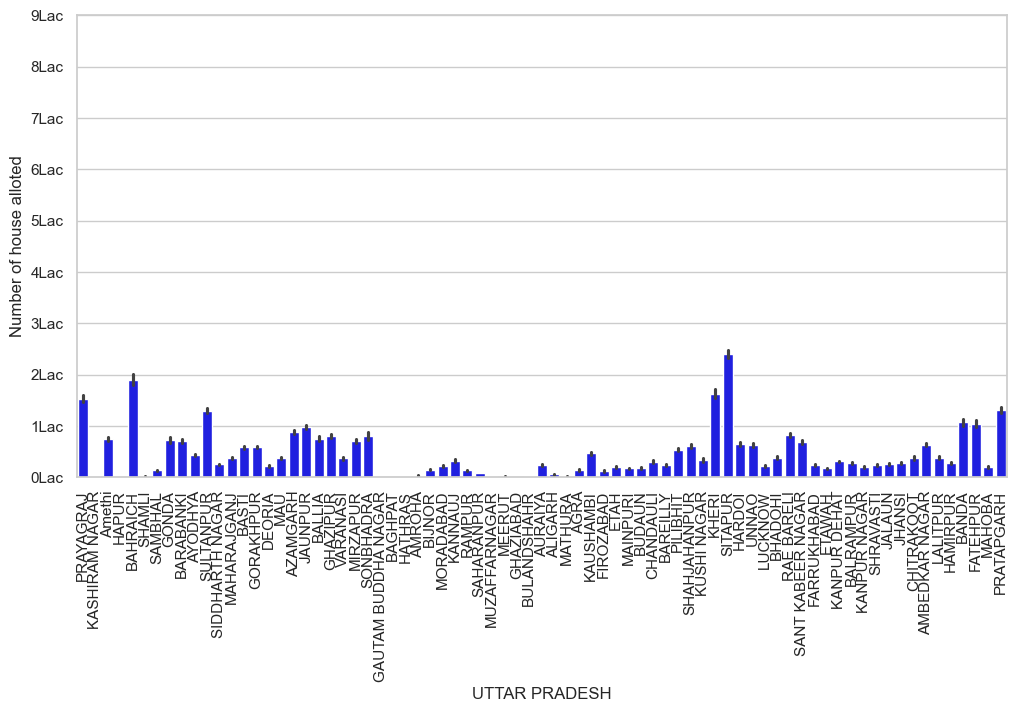

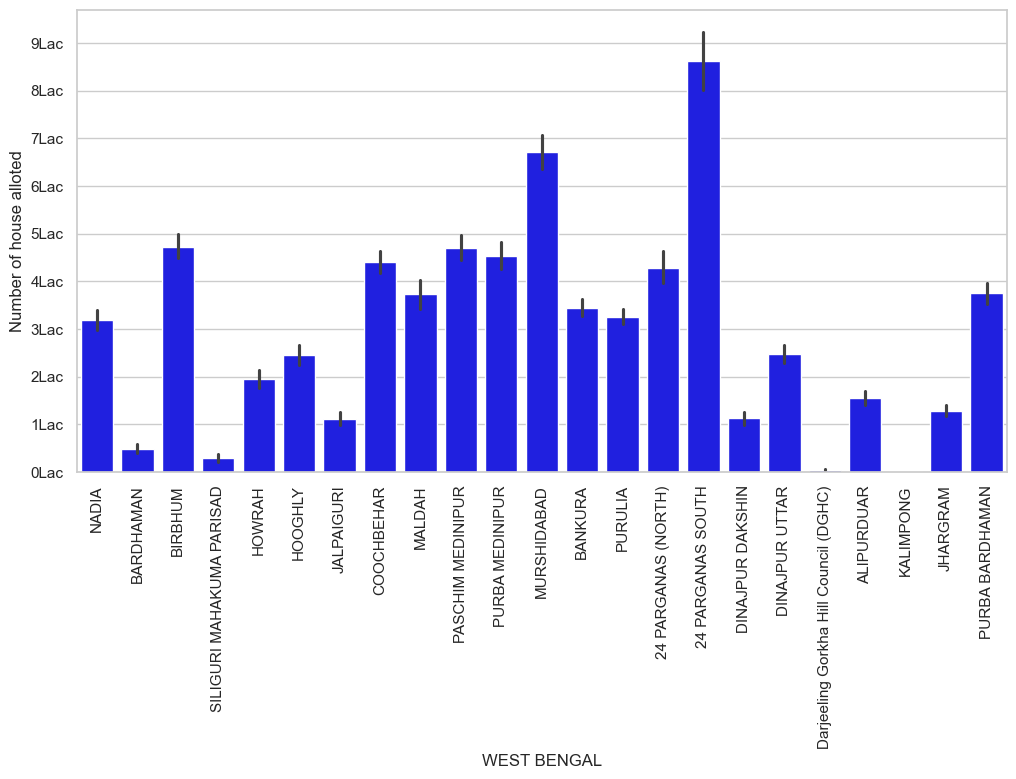

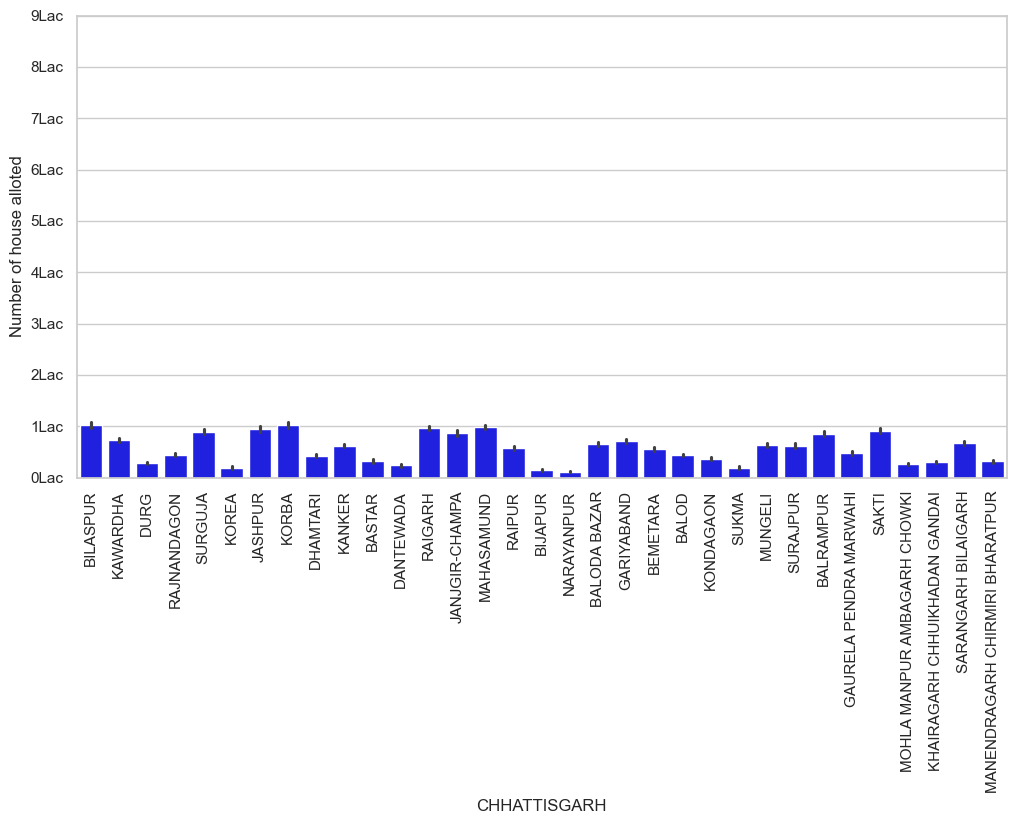

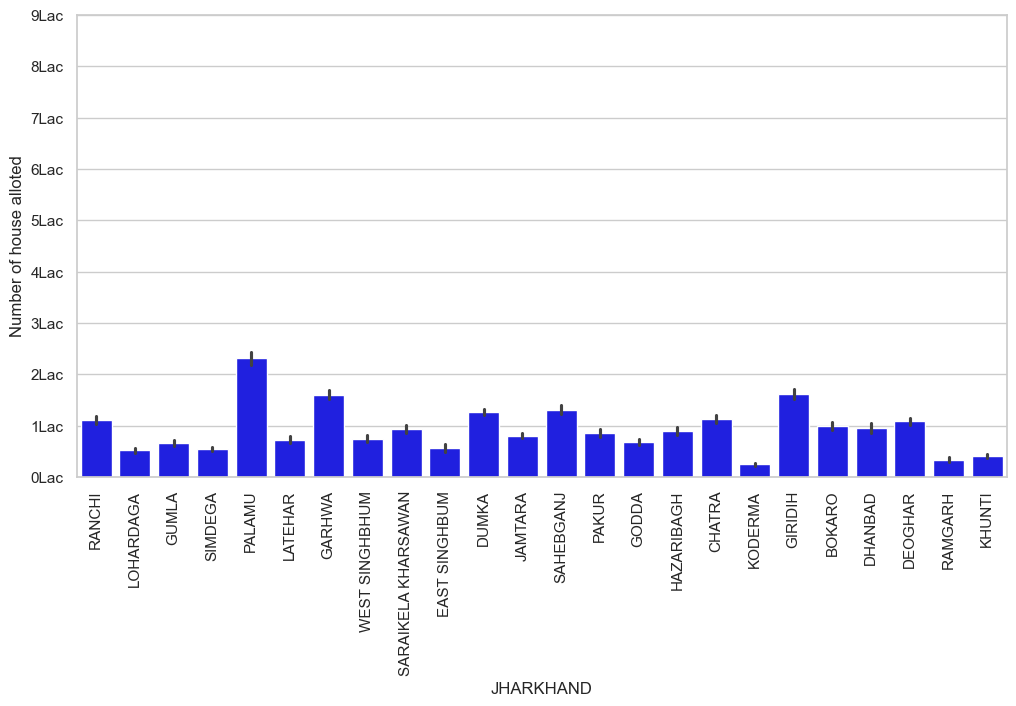

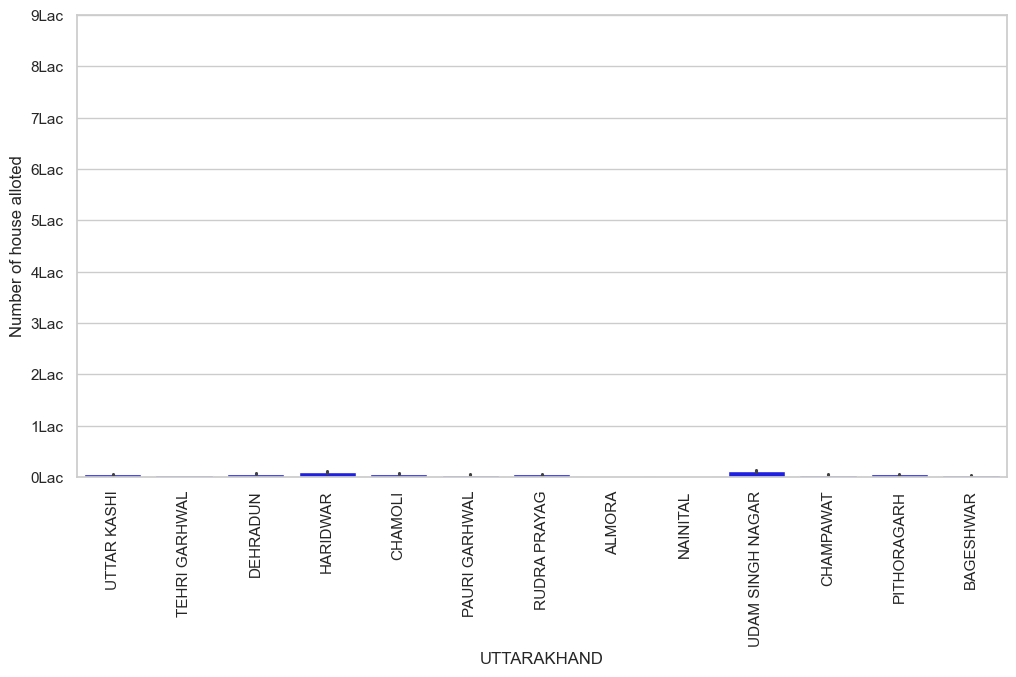

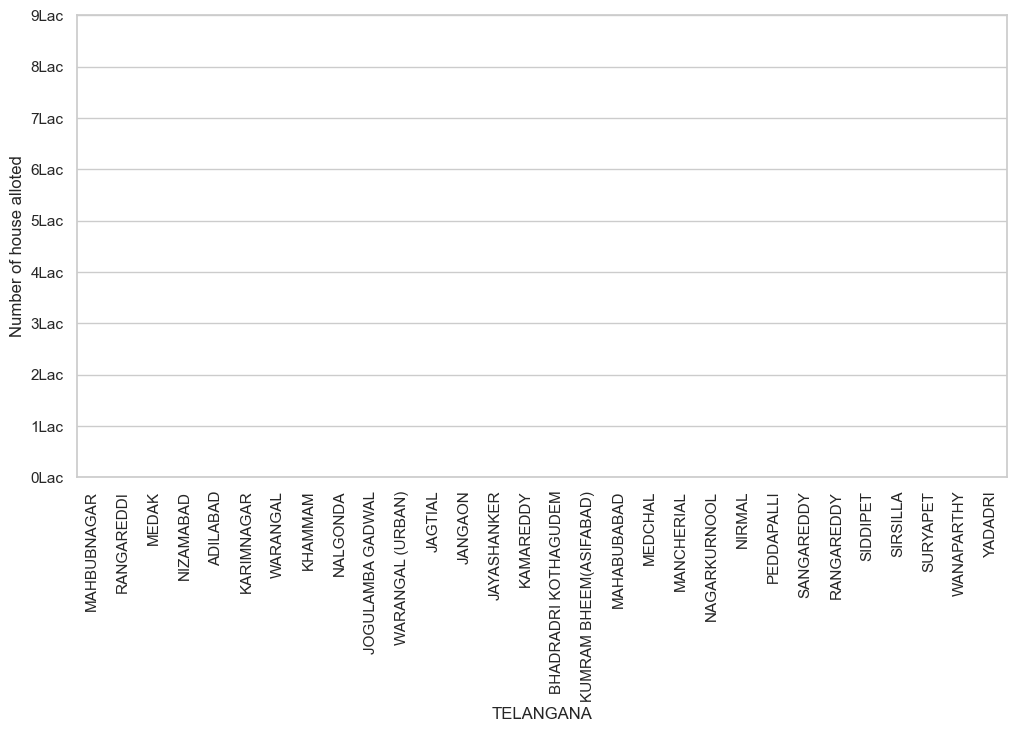

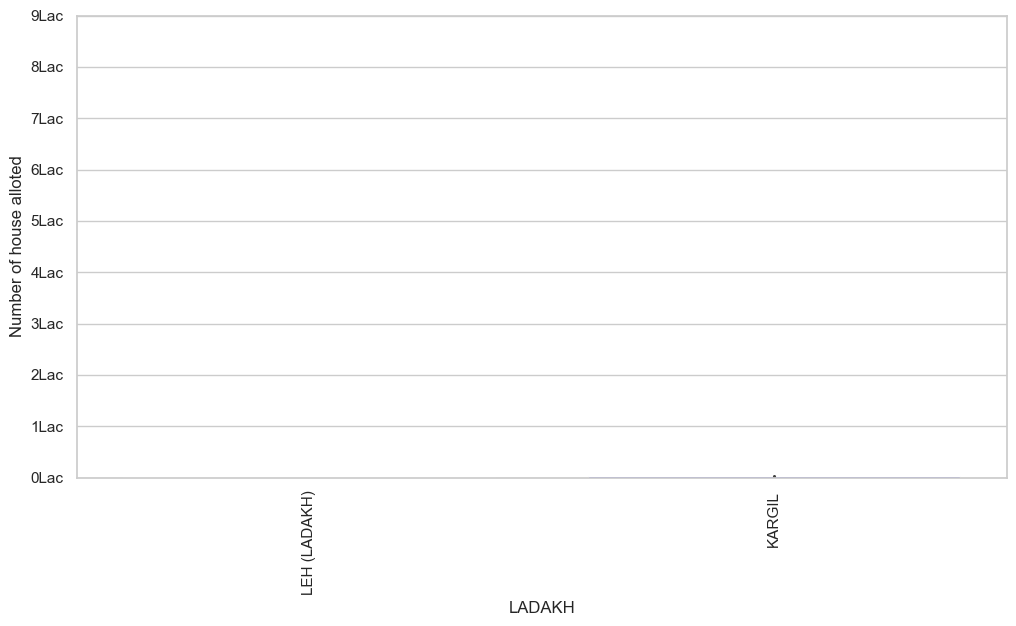

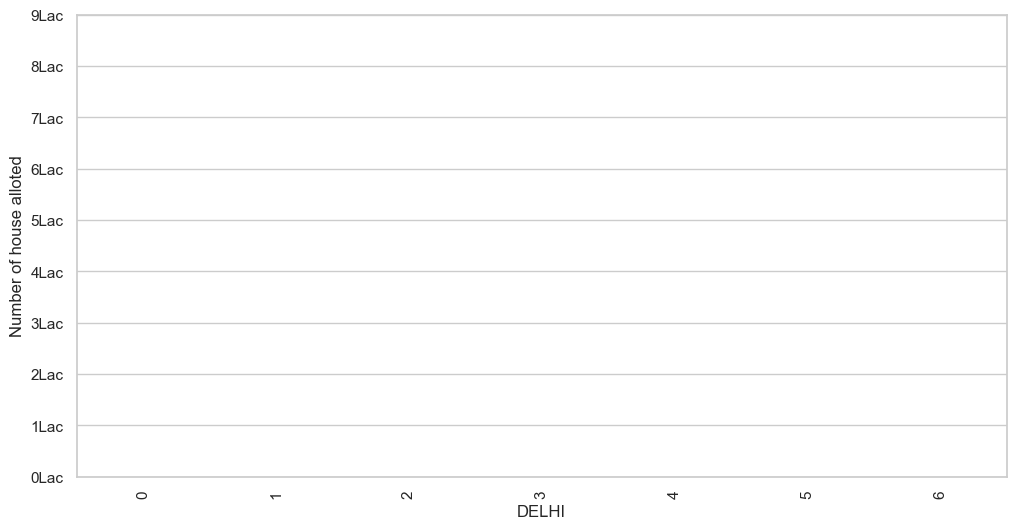

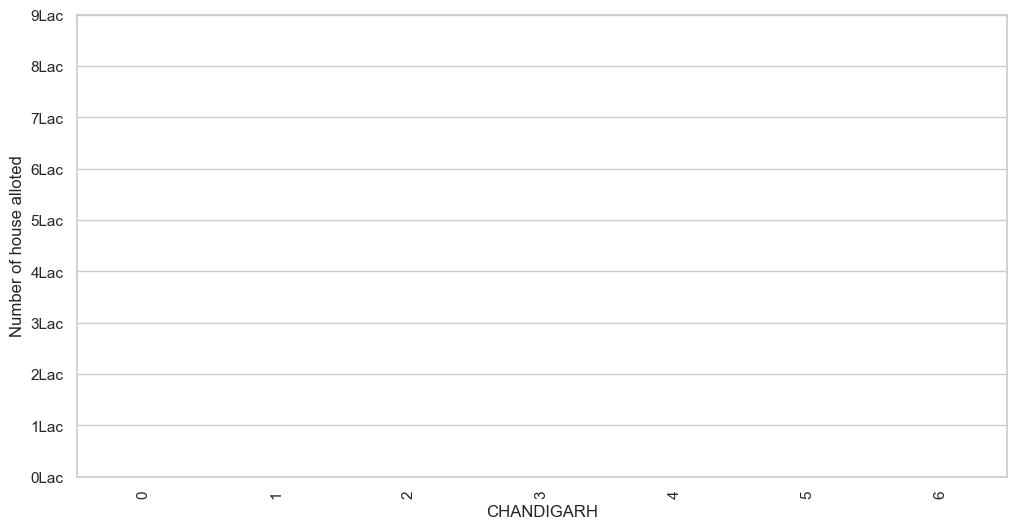

In [17]:
for stnm in df1.state_name.unique():
    plt.subplots(figsize=(12, 6))
    df2 = df1[df1.state_name == stnm]
    sns.barplot(x = df2.district_name, y = df2.Total, color = 'blue', estimator=np.sum)
    plt.xticks(rotation = 90)
    plt.ylabel('Number of house alloted')
    plt.xlabel(stnm)
    
    ticks = np.arange(0, 1000000, 100000)
    labels = ["{}Lac".format(i//100000) for i in ticks]
    plt.yticks(ticks, labels)

    plt.show()

!pip install geopandas #Install geopandas lib for geo/map plots

!pip install shapely

!pip install pyshp

In [18]:
fp = r'india-polygon.shp'   # Get shape file for India
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [52]:
#map_df.index =  np.arange(1, len(map_df)+1)

In [53]:
map_df.st_nm = map_df.st_nm.str.replace('Islands','')  # remove Islands from "Andaman And Nicobar Islands" state name to use ahead for Join
map_df.st_nm = map_df.st_nm.str.upper()  # Upper case the state names

In [54]:
map_df = map_df.sort_values(by=['st_nm'])  # Sort df on state names
map_df.head(5)

,id,st_nm,geometry
1,None,ANDAMAN AND NICOBAR,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
2,None,ANDHRA PRADESH,"POLYGON ((81.10545 17.82313, 81.39342 17.81473..."
3,None,ARUNACHAL PRADESH,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
4,None,ASSAM,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
5,None,BIHAR,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."


### Map total house allotment state wise over India Map

In [55]:
#res = res.reset_index()
df2 = df1[['state_name','Total','SC','ST','Minority']]
df2.head(5)

,state_name,Total,SC,ST,Minority
0,ANDAMAN AND NICOBAR,6,0.0,6.0,0.0
1,ANDAMAN AND NICOBAR,2,0.0,2.0,0.0
2,ANDAMAN AND NICOBAR,155,0.0,0.0,25.0
3,ANDAMAN AND NICOBAR,50,0.0,0.0,21.0
4,ANDAMAN AND NICOBAR,55,0.0,0.0,9.0


In [56]:
df2 = df2.groupby(['state_name'])

In [57]:
df2 = df2.sum('Total')

In [58]:
df2 = df2.reset_index()
df2.head(5)

,state_name,Total,SC,ST,Minority
0,ANDAMAN AND NICOBAR,3548,1.0,10.0,731.0
1,ANDHRA PRADESH,252233,78301.0,44950.0,7956.0
2,ARUNACHAL PRADESH,36232,0.0,34642.0,562.0
3,ASSAM,2272788,180918.0,411981.0,926218.0
4,BIHAR,5069485,733742.0,99736.0,844792.0


In [59]:
#df2.index =  np.arange(1, len(df2)+1)

In [60]:
df2.head(5)

,state_name,Total,SC,ST,Minority
1,ANDAMAN AND NICOBAR,3548,1.0,10.0,731.0
2,ANDHRA PRADESH,252233,78301.0,44950.0,7956.0
3,ARUNACHAL PRADESH,36232,0.0,34642.0,562.0
4,ASSAM,2272788,180918.0,411981.0,926218.0
5,BIHAR,5069485,733742.0,99736.0,844792.0


In [61]:
df2 = df2.sort_values(by = ['state_name'])
df2 = df2.reset_index()

In [62]:
#test = test.sort_values(by=['state_name'])
ind_map = map_df.set_index('st_nm').join(df2.set_index('state_name'))
#test3 = tst.join(test, on='state_name', how='inner', lsuffix='_left', rsuffix='_right')

In [63]:
ind_map.head(5)

,id,geometry,index,Total,SC,ST,Minority
st_nm,,,,,,,
ANDAMAN AND NICOBAR,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,NaN,NaN,NaN
ANDHRA PRADESH,None,"POLYGON ((81.10545 17.82313, 81.39342 17.81473...",2.0,252233.0,78301.0,44950.0,7956.0
ARUNACHAL PRADESH,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",3.0,36232.0,0.0,34642.0,562.0
ASSAM,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",4.0,2272788.0,180918.0,411981.0,926218.0
BIHAR,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",5.0,5069485.0,733742.0,99736.0,844792.0


### Working on get 1st row(ANDAMAN AND NICOBAR) values. Column values from df2 are NaN after join with ind_map
##### #Tried reseting index for ind_map and df2. dosent seem to have any affect.

<Axes: title={'center': 'House allotement in India under \n PM Aawas yojna state-wise'}>

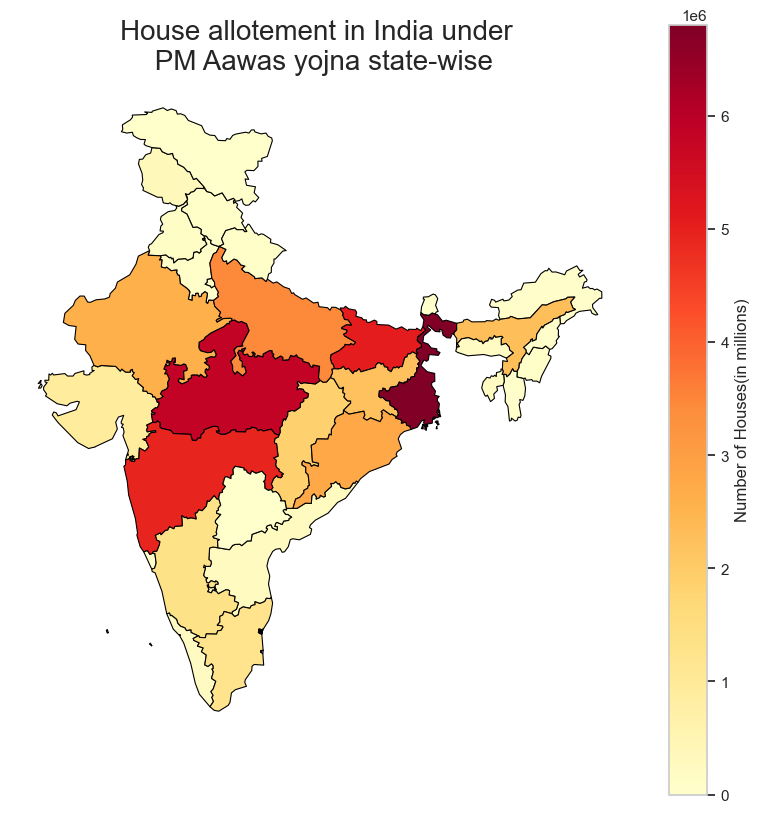

In [46]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('House allotement in India under \n PM Aawas yojna state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
ind_map.plot(column='Total',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of Houses(in millions)"})

<Axes: title={'center': 'House allotement to SC category in India under \n PM Aawas yojna state-wise'}>

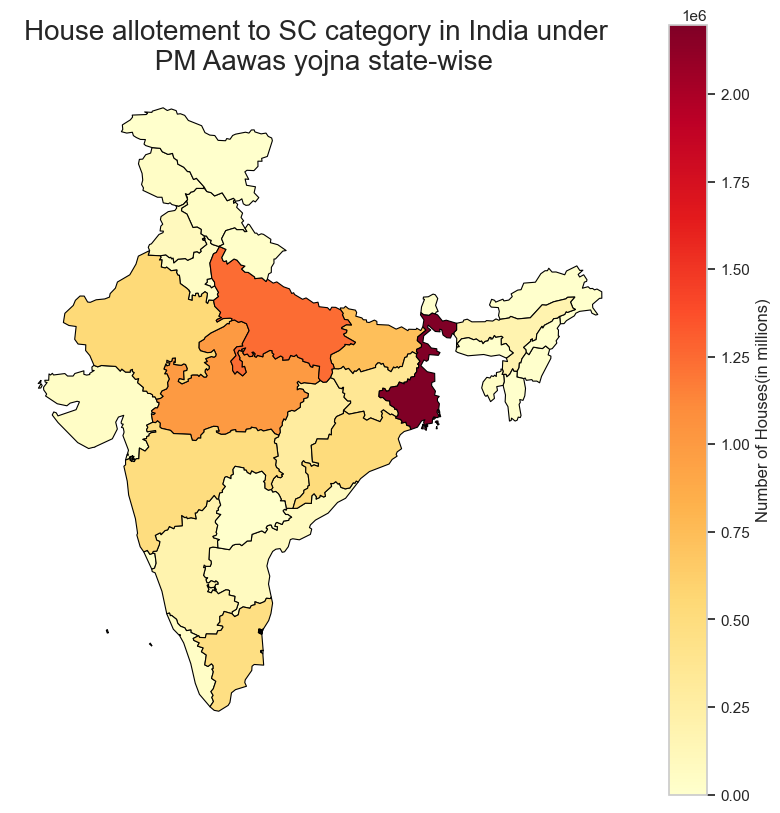

In [50]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('House allotement to SC category in India under \n PM Aawas yojna state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
ind_map.plot(column='SC',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of Houses(in millions)"})

<Axes: title={'center': 'House allotement to ST category in India under \n PM Aawas yojna state-wise'}>

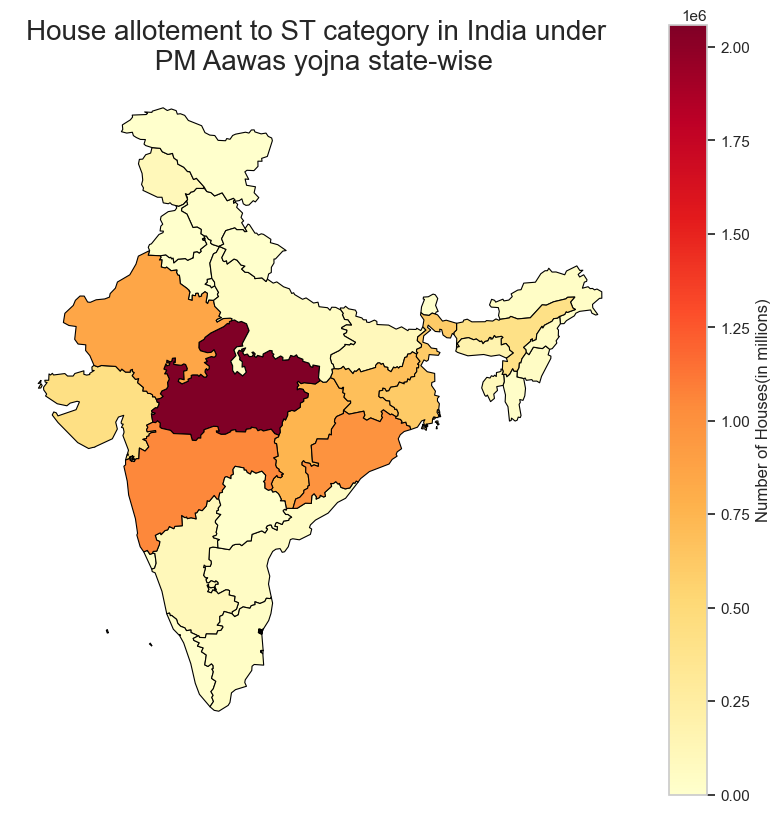

In [49]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('House allotement to ST category in India under \n PM Aawas yojna state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
ind_map.plot(column='ST',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of Houses(in millions)"})

<Axes: title={'center': 'House allotement to Minority category in India under \n PM Aawas yojna state-wise'}>

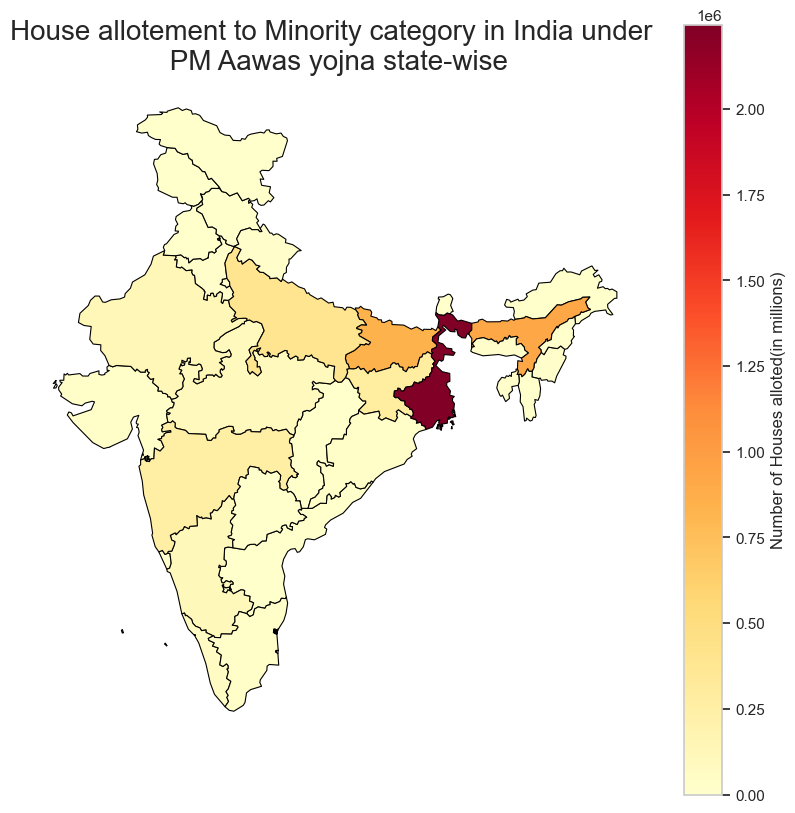

In [51]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('House allotement to Minority category in India under \n PM Aawas yojna state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
ind_map.plot(column='Minority',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of Houses alloted(in millions)"})